In [16]:
%%capture
!pip install speechbrain
!pip install transformers
!pip install matplotlib

# load model

In [37]:
import torch
import matplotlib.pyplot as plt
from speechbrain.lobes.models.huggingface_wav2vec import HuggingFaceWav2Vec2
from speechbrain.dataio.dataio import read_audio


model_hub = "LeBenchmark/wav2vec2-FR-7K-large"
save_path = "model"
model = HuggingFaceWav2Vec2(model_hub, save_path)

In [38]:
# test model


In [39]:
signal = read_audio('../best-rq-test/spk1_snt1.wav').unsqueeze(0)
with torch.no_grad():
    outputs = model.model(signal, output_attentions=True)


In [49]:
# Extract the attention weights
attention_weights = outputs.attentions

# Choose a layer and head to visualize (e.g., layer 1, head 2)
layer = 23
head = 16

# Get the attention weights for the selected layer and head
attention_weights_layer_head = attention_weights[layer][0][head]

# Plot the attention map as a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(attention_weights_layer_head, cmap='viridis', aspect='auto')
plt.title(f'Attention Map - Layer {layer}, Head {head}')
plt.xlabel('To')
plt.ylabel('From')
plt.colorbar()
plt.show()

IndexError: index 16 is out of bounds for dimension 0 with size 16

In [41]:
# layer = 10

# att_layer = model.model.encoder.layers[layer].attention


# plt.figure(figsize=(10, 8))
# plt.imshow(att_layer.k_proj.weight.detach().numpy(), cmap='Greys', aspect='auto')
# # plt.title(f'Attention Map - Layer {layer}, Head {head}')
# plt.xlabel('To')
# plt.ylabel('From')
# plt.colorbar()
# plt.show()

In [20]:
att_layer = model.model.encoder.layers[0]
att_layer

Wav2Vec2EncoderLayerStableLayerNorm(
  (attention): Wav2Vec2Attention(
    (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
    (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (feed_forward): Wav2Vec2FeedForward(
    (intermediate_dropout): Dropout(p=0.0, inplace=False)
    (intermediate_dense): Linear(in_features=1024, out_features=4096, bias=True)
    (intermediate_act_fn): GELUActivation()
    (output_dense): Linear(in_features=4096, out_features=1024, bias=True)
    (output_dropout): Dropout(p=0.1, inplace=False)
  )
  (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
)

In [32]:

model_hub = "LeBenchmark/wav2vec2-FR-7K-large"
save_path = "model"
model = HuggingFaceWav2Vec2(model_hub, save_path)

In [33]:
signal = read_audio('../best-rq-test/spk1_snt1.wav').unsqueeze(0)
with torch.no_grad():
    outputs = model.model(signal, output_attentions=True)

In [34]:
model.model.encoder

Wav2Vec2EncoderStableLayerNorm(
  (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
    (conv): Conv1d(1024, 1024, kernel_size=(128,), stride=(1,), padding=(64,), groups=16)
    (padding): Wav2Vec2SamePadLayer()
    (activation): GELUActivation()
  )
  (layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (layers): ModuleList(
    (0-23): 24 x Wav2Vec2EncoderLayerStableLayerNorm(
      (attention): Wav2Vec2Attention(
        (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
        (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
      (layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (feed_forward): Wav2Vec2FeedForward(
        (intermediate_dropout): Dropout(p=0.0, inpl

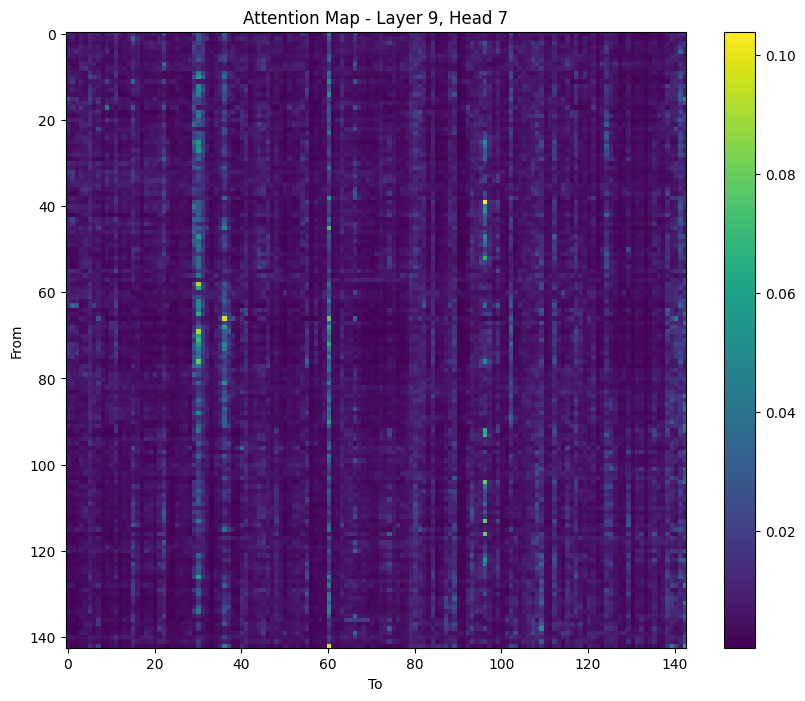

In [35]:
# Extract the attention weights
attention_weights = outputs.attentions

# Choose a layer and head to visualize (e.g., layer 1, head 2)
layer = 9
head = 7

# Get the attention weights for the selected layer and head
attention_weights_layer_head = attention_weights[layer][0][head]

# Plot the attention map as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(attention_weights_layer_head, cmap='viridis', aspect='auto')
plt.title(f'Attention Map - Layer {layer}, Head {head}')
plt.xlabel('To')
plt.ylabel('From')
plt.colorbar()
plt.show()

TypeError: 'NoneType' object is not subscriptable

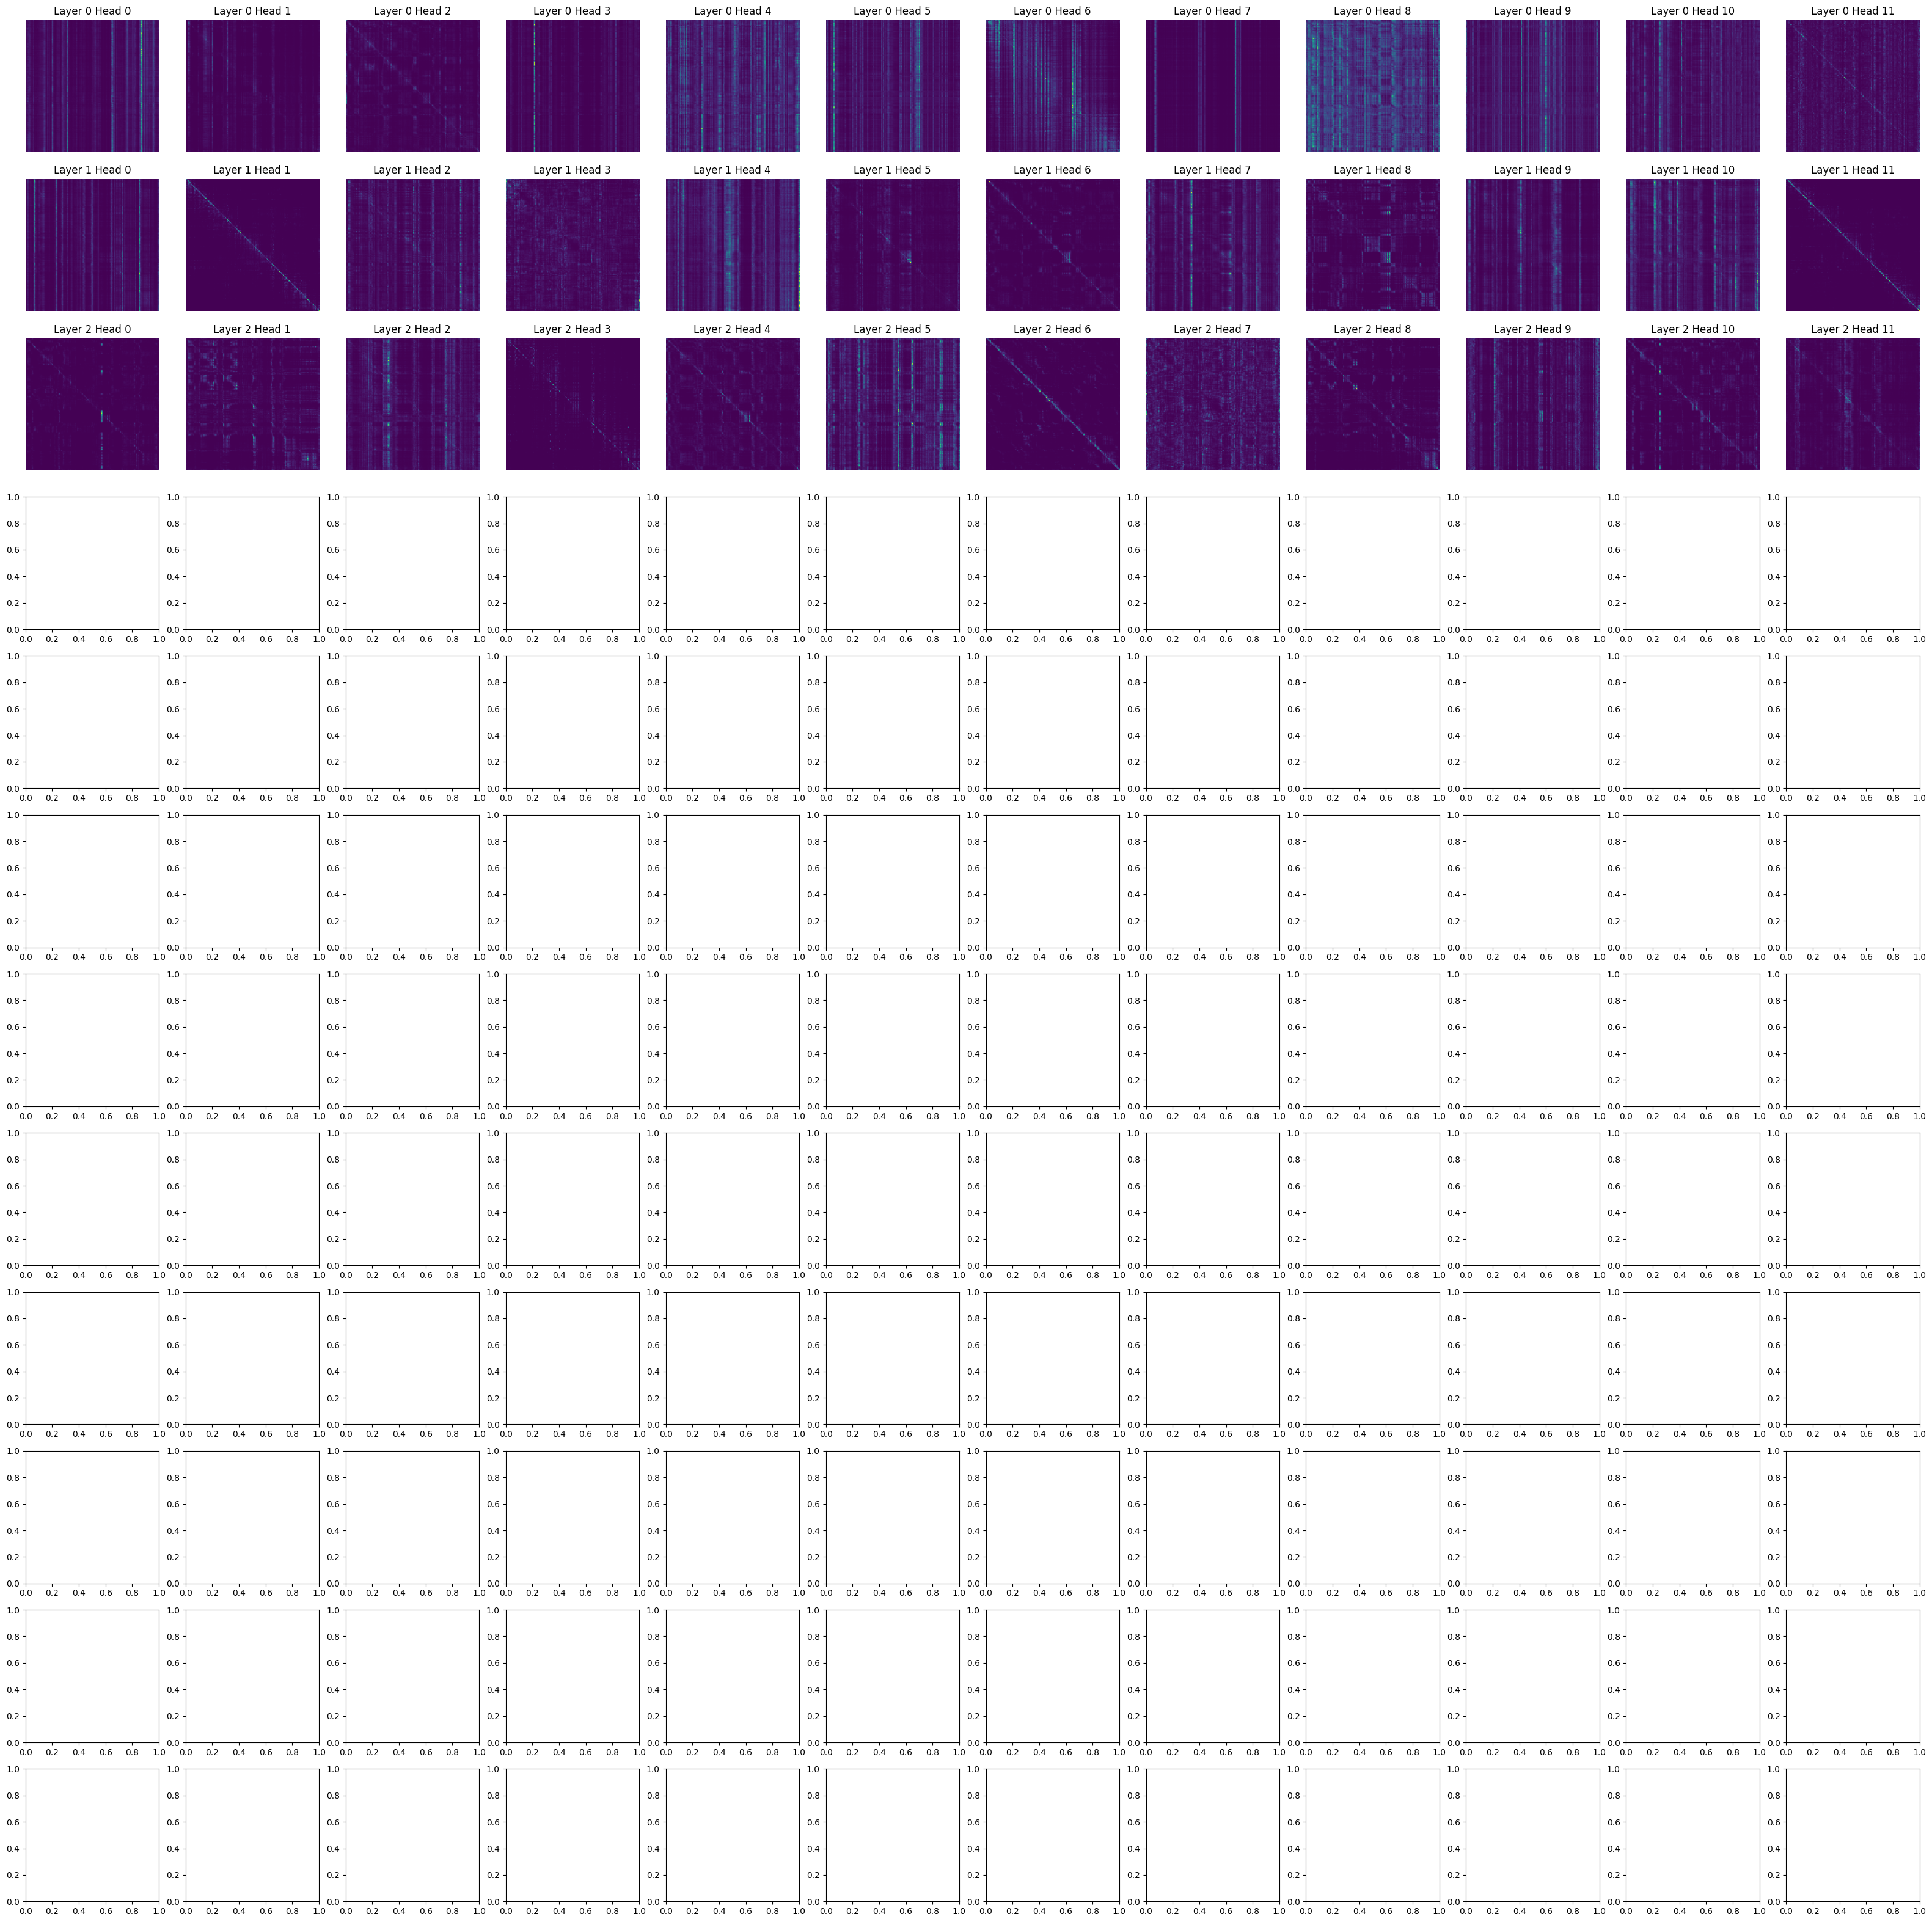

In [36]:
import matplotlib.pyplot as plt

# Create example matrices (you should replace these with your own data)
num_layer = 12
num_heads = 12
# matrix_data = [np.random.rand(10, 10) for _ in range(num_rows * num_cols)]

# Set up the figure and subplots
fig, axes = plt.subplots(num_layer, num_heads, figsize=(40, 40))

# Loop through matrices and create subplots
for i in range(num_layer):
    for j in range(num_heads):
        ax = axes[i, j]
        attention_weights_layer_head = attention_weights[i][0][j]
        
        # Plot the matrix as an image
        ax.imshow(attention_weights_layer_head, cmap='viridis', aspect='auto')
        
        # Optionally, you can add labels or other customization here
        ax.set_title(f'Layer {i} Head {j}')
        ax.axis('off')  # Turn off axis labels
        
# Adjust spacing between subplots if needed
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
attention_weights[0][0][4]

NameError: name 'attention_weights' is not defined

In [31]:
model_hub = "/Users/ryanwhetten/Dev/lebenchmark-evaluation/CKPT+2023-09-15+01-30-48+00"
save_path = "model"
model = HuggingFaceWav2Vec2(model_hub, save_path)

OSError: /Users/ryanwhetten/Dev/lebenchmark-evaluation/CKPT+2023-09-15+01-30-48+00 does not appear to have a file named preprocessor_config.json. Checkout 'https://huggingface.co//Users/ryanwhetten/Dev/lebenchmark-evaluation/CKPT+2023-09-15+01-30-48+00/main' for available files.

In [ ]:
signal = read_audio('../best-rq-test/spk1_snt1.wav').unsqueeze(0)
with torch.no_grad():
    outputs = model.model(signal, output_attentions=True)

In [111]:
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml

# this is a simplified SpeechBrain class for inference only
class ASR(sb.core.Brain):
    def compute_forward(self, waveform):
        # move waveform to device
        waveform = waveform.to(self.device)

        # Forward pass >>>
        
        # Transformer model
        features = self.modules.wav2vec2(waveform)
        
        # Head model
        x = self.modules.enc(features)        
        logits = self.modules.ctc_lin(x)
        log_probabilities = sb.nnet.activations.Softmax(apply_log=True)(logits)

        return log_probabilities

path = "for_ryan/base"
# loads the YAML file containing the hyperparameters
with open(path + "/hyperparams_w2v2_base.yaml") as fin:
    hparams = load_hyperpyyaml(fin)


# this instantiate the ASR class
asr_brain = ASR(modules=hparams["modules"], checkpointer=hparams["checkpointer"])

# this loads the checkpoint
asr_brain.on_evaluate_start()

# load the tokenizer and affect it to the ASR model
# tokenizer = SentencePiece(model_dir="tokenizer", vocab_size=76, model_type="char")
# asr_brain.tokenizer = tokenizer

def infer(waveform):
    output = asr_brain.compute_forward(waveform.unsqueeze(0))
#     sequence = sb.decoders.ctc_greedy_decode(output, torch.Tensor([1.0]), blank_id=0)
#     predicted_words = tokenizer(sequence, task="decode_from_list")
#     return ' '.join(predicted_words[0])

# infer(waveform)

In [112]:
signal = read_audio('for_ryan/samples/common_voice_fr_19364697.wav').unsqueeze(0)
with torch.no_grad():
    outputs = asr_brain.modules.wav2vec2.model(signal, output_attentions=True)

In [118]:
len(attention_weights[0][0])

12

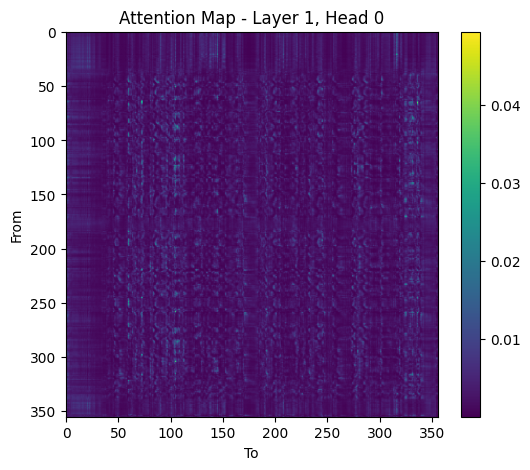

In [121]:
# Extract the attention weights
attention_weights = outputs.attentions

# Choose a layer and head to visualize (e.g., layer 1, head 2)
layer = 1
head = 0

# Get the attention weights for the selected layer and head
attention_weights_layer_head = attention_weights[layer][0][head]

# Plot the attention map as a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(attention_weights_layer_head, cmap='viridis', aspect='auto')
plt.title(f'Attention Map - Layer {layer}, Head {head}')
plt.xlabel('To')
plt.ylabel('From')
plt.colorbar()
plt.show()

In [122]:
# import matplotlib.pyplot as plt

# # Create example matrices (you should replace these with your own data)
# num_layer = 12
# num_heads = 12
# # matrix_data = [np.random.rand(10, 10) for _ in range(num_rows * num_cols)]

# # Set up the figure and subplots
# fig, axes = plt.subplots(num_layer, num_heads, figsize=(40, 40))

# # Loop through matrices and create subplots
# for i in range(num_layer):
#     for j in range(num_heads):
#         ax = axes[i, j]
#         attention_weights_layer_head = attention_weights[i][0][j]
        
#         # Plot the matrix as an image
#         ax.imshow(attention_weights_layer_head, cmap='viridis', aspect='auto')
        
#         # Optionally, you can add labels or other customization here
#         ax.set_title(f'Layer {i} Head {j}')
#         ax.axis('off')  # Turn off axis labels
#     break
# # Adjust spacing between subplots if needed
# plt.tight_layout()

# # Show the plot
# plt.show()

In [123]:
def get_diagonality(matrix):
    x, y = matrix.shape
    # print(matrix.shape)
    
    c = torch.zeros(x)
    for i in range(x):    
        s = torch.zeros(y)
        for j in range(y):
            
            # get weighted value
            s[j] = matrix[i,j] * abs(i-j)      
        # get max distance from i
        max = (torch.full((1,y),i) - torch.arange(y)).abs().max()
        # print('sum: ', s.sum())
        # print('max: ', max)
        
        # 1 - weighted sum / max distance
        c[i] = 1 - ( s.sum() / max )
    # print('c: ', c)
    return c.mean()

In [124]:
D_base = torch.zeros(num_layer, num_heads)
for i in range(num_layer):
    for j in range(num_heads):
        attention_weights_layer_head = attention_weights[i][0][j]
        D_base[i,j] = get_diagonality(attention_weights_layer_head)

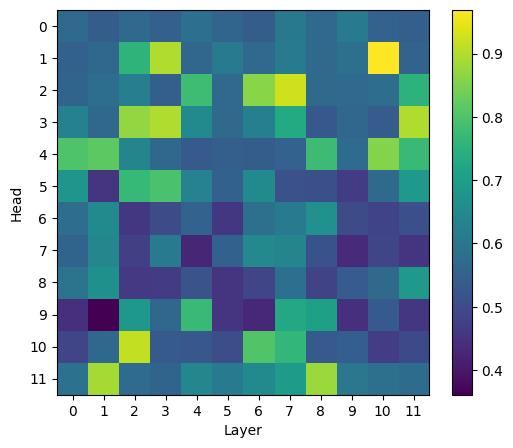

In [125]:
plt.figure(figsize=(6, 5))
plt.imshow(D_base, cmap='viridis', aspect='auto')

x_ticks_interval = 1
y_ticks_interval = 1

# Set the ticks for the x-axis and y-axis
plt.xticks(torch.arange(0, D_base.shape[1], x_ticks_interval))
plt.yticks(torch.arange(0, D_base.shape[0], y_ticks_interval))

# plt.title(f'Attention Map - Layer {layer}, Head {head}')
plt.xlabel('Layer')
plt.ylabel('Head')
plt.colorbar()
plt.show()

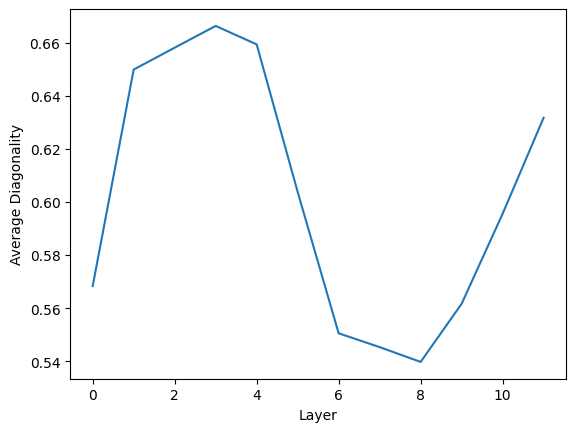

In [93]:
x = torch.arange(12)
y_b = D_base.mean(dim=1)
# y_l = D_large.mean(dim=1)


# Create a line plot
plt.plot(x, y_b)
# plt.plot(x, y_l)

# Add labels and title
plt.xlabel('Layer')
plt.ylabel('Average Diagonality')
plt.title('')

# Display the plot
plt.show()